In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
# import random forest
from sklearn.ensemble import RandomForestRegressor
import pickle

### Data Collection and Preprocessing

In [212]:
df=pd.read_csv("Stock Data.csv")
df


,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2000-10-16,29.49,29.94,29.29,29.87,13513900,0.675586,31.263173,28.560827,29.49,...,71.051,74.9815,79.7930,1374.62,1374.17,1402.03,10238.80,10192.18,10568.43,28.77
1,2000-10-17,29.84,29.84,28.42,28.77,17530200,0.714986,31.309472,28.449528,29.87,...,70.550,74.3305,79.5488,1349.97,1374.62,1387.02,10089.71,10238.80,10524.40,28.71
2,2000-10-18,27.80,28.87,27.35,28.71,19151700,0.748074,31.350148,28.357852,28.77,...,69.885,73.6055,79.2676,1342.13,1349.97,1364.59,9975.02,10089.71,10413.79,28.77
3,2000-10-19,28.71,28.94,28.32,28.77,13716500,0.765210,31.371420,28.310580,28.71,...,69.814,73.4885,79.1532,1388.76,1342.13,1329.78,10142.98,9975.02,10034.58,26.96
4,2000-10-20,28.32,28.58,26.71,26.96,18720100,1.000374,31.710747,27.709253,28.77,...,70.103,73.1995,79.0922,1396.93,1388.76,1374.17,10226.59,10142.98,10192.18,25.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2020-08-07,6.29,6.46,6.25,6.40,83026200,0.363499,7.407497,5.953503,6.33,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,6.67
4984,2020-08-10,6.43,6.70,6.38,6.67,94345000,0.363476,7.405952,5.952048,6.40,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,6.73
4985,2020-08-11,6.87,7.00,6.69,6.73,93141500,0.360647,7.392793,5.950207,6.67,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,6.72
4986,2020-08-12,6.87,6.88,6.58,6.72,70186500,0.343764,7.338027,5.962973,6.73,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,6.60


In [213]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,4988.000000,4988.000000,4988.000000,4988.000000,4.988000e+03,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,...,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000
mean,17.585774,17.759160,17.394794,17.575962,5.117453e+07,0.466113,18.552773,16.688322,17.580551,17.584856,...,73.888632,73.698425,73.168746,1626.121628,1625.720814,1624.128518,14538.521628,14534.972201,14521.069340,17.571309
std,5.461586,5.476424,5.456436,5.468983,4.486074e+07,0.291396,5.490028,5.467915,5.469375,5.469275,...,54.240454,53.878333,52.854598,642.398459,641.931570,640.096471,5575.054846,5572.183647,5560.878452,5.468395
min,4.590000,4.880000,3.990000,4.530000,5.292500e+06,0.053764,6.885675,3.869015,4.530000,4.530000,...,18.123000,18.547000,19.793800,676.530000,676.530000,676.530000,6547.050000,6547.050000,6547.050000,4.530000
25%,13.060000,13.227500,12.867500,13.050000,2.434290e+07,0.262698,14.018316,12.012198,13.057500,13.060000,...,34.448500,34.472375,34.271250,1149.882500,1149.882500,1149.882500,10428.042500,10427.932500,10427.195000,13.047500
50%,18.345000,18.485000,18.170000,18.320000,3.804330e+07,0.391425,19.103895,17.694657,18.320000,18.320000,...,49.042500,49.220250,49.440500,1359.235000,1359.235000,1358.515000,12427.005000,12425.120000,12420.555000,18.320000
75%,21.360000,21.530000,21.200000,21.370000,6.170410e+07,0.564644,22.263849,20.625496,21.370000,21.370000,...,102.549250,102.384250,102.353600,2064.155000,2063.990000,2063.362500,17686.252500,17685.250000,17675.927500,21.370000
max,29.840000,29.940000,29.290000,29.870000,7.830205e+08,2.024254,32.171534,28.560827,29.870000,29.870000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,28.770000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4988 non-null   object 
 1   Open              4988 non-null   float64
 2   High              4988 non-null   float64
 3   Low               4988 non-null   float64
 4   Close(t)          4988 non-null   float64
 5   Volume            4988 non-null   int64  
 6   SD20              4988 non-null   float64
 7   Upper_Band        4988 non-null   float64
 8   Lower_Band        4988 non-null   float64
 9   S_Close(t-1)      4988 non-null   float64
 10  S_Close(t-2)      4988 non-null   float64
 11  S_Close(t-3)      4988 non-null   float64
 12  S_Close(t-5)      4988 non-null   float64
 13  S_Open(t-1)       4988 non-null   float64
 14  MA5               4988 non-null   float64
 15  MA10              4988 non-null   float64
 16  MA20              4988 non-null   float64


In [215]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close(t)         0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 64, dtype: int64

In [216]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

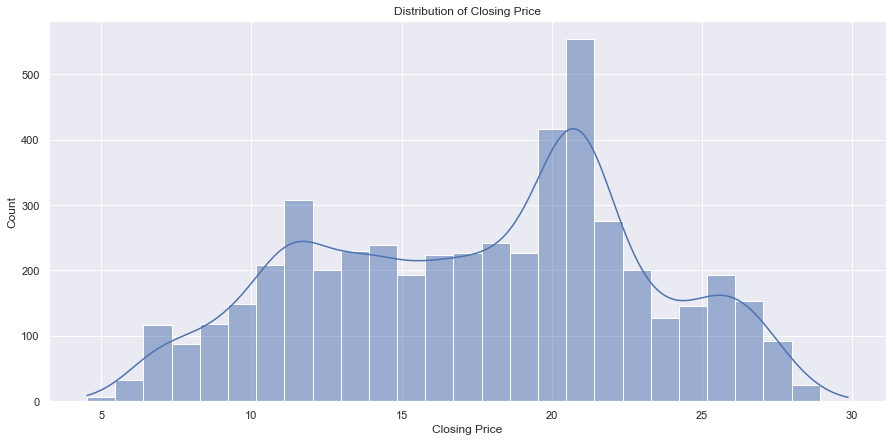

In [219]:
plt.figure(figsize=(15,7))

sns.histplot(df['Close(t)'], kde=True)
plt.xlabel('Closing Price')
plt.title('Distribution of Closing Price')
plt.show()

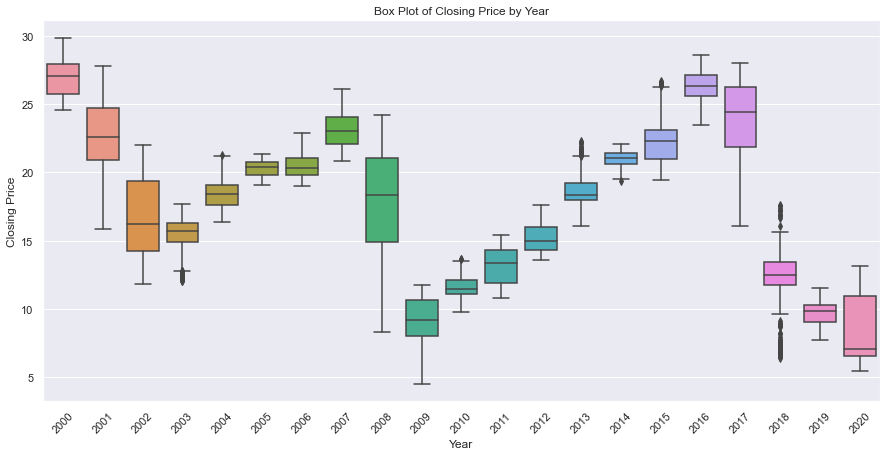

In [220]:
plt.figure(figsize=(15,7))

sns.boxplot(x=df['Year'], y=df['Close(t)'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Box Plot of Closing Price by Year')
plt.xticks(rotation=45)
plt.show()

### Model Selection and Training

In [265]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values('Date')

In [266]:
start_date = df['Date'].min()
X = (df['Date'] - start_date) / np.timedelta64(1, 'D')
X = X.values.reshape(-1, 1)

y=df['Close(t)']

In [267]:
model_LR = LinearRegression()
model_LR.fit(X, y)


print("Score: ", model_LR.score(X, y))




Score:  0.04214641789362927


In [268]:
# random forest
model_RF = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10, random_state=1)
model_RF.fit(X, y)
# evluate
print("Score: ", model_RF.score(X, y))


Score:  0.9945004796006641


In [269]:
user_dates = ['2023-05-15', '2023-05-16'] 

user_dates = pd.to_datetime(user_dates)

user_data = (user_dates - start_date) / np.timedelta64(1, 'D')
user_data = user_data.values.reshape(-1, 1)

predictions = model_RF.predict(user_data)

for date, prediction in zip(user_dates, predictions):
    print(f"Prediction for {date}: {prediction}")

Prediction for 2023-05-15 00:00:00: 6.549836055453089
Prediction for 2023-05-16 00:00:00: 6.549836055453089
Prediction for 2023-05-17 00:00:00: 6.549836055453089


In [270]:
def  plot_predictions(start_date,end_date,model):    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    user_data = (pd.date_range(start_date, end_date) - start_date) / np.timedelta64(1, 'D')
    user_data = user_data.values.reshape(-1, 1)

    predictions = model.predict(user_data)

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=pd.date_range(start_date, end_date), y=predictions.flatten(), label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Predicted Stock Prices')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

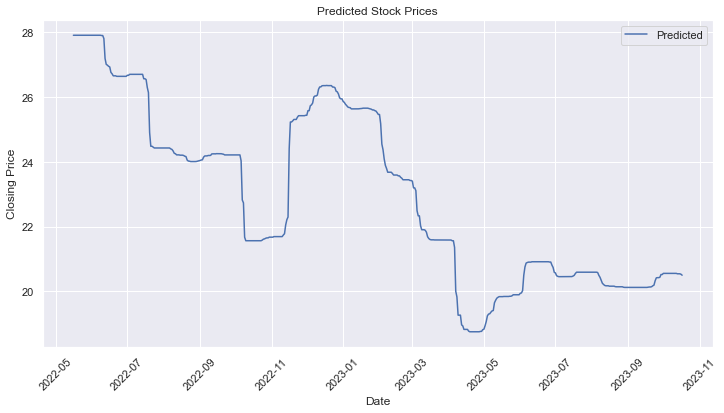

In [276]:
start_date='2022-05-16'
end_date='2023-10-17'
plot_predictions(start_date,end_date,model_RF)

In [272]:
# save in pickle file
pickle.dump(model_RF, open('model_RF.pkl','wb'))